## <center> Estimation d'une incertitude expérimentale ##

Le but de ce notebook est d'évaluer par **propagation des erreurs** une incertitude expérimentale. Le principe repose sur la génération de nombres aléatoires : on parle de **méthode Monte Carlo**.

***

- Sans contextualiser, considérons qu'on mesure expérimentalement deux grandeurs $x_\text{mes}$ et $y_\text{mes}$, avec des incertitudes respectives $\Delta x$ et $\Delta y$. De ces deux grandeurs on souhaite déduire $z$ donnée par

$$ z = f(x,\, y) $$

- On souhaite connaître l'incertitude $\Delta z$ sur $z$ qui résulte des incertitudes $\Delta x$ et $\Delta y$ sur $x$ et $y$.


- Pour cela, la méthode Monte Carlo propose de créer $N$ couples générés aléatoirement $(x_i,\, y_i)$, selon une distribution de probabilité choisie (en pratique, soit uniforme, soit gaussienne qu'on appelle aussi distribution normale)
de moyennes respectives $x_\text{mes}$ et $y_\text{mes}$ et d'écart-type $\Delta x$ et $\Delta y$. De ces $N$ couples, on déduit $N$ valeurs de $z$. L'étude de la distribution de ces $N$ valeurs de $z$ permet de remonter à une moyenne $z_\text{mes}$ et à un écart-type qu'on identifiera comme l'incertitude $\Delta z$.

***

Mettons cette méthode en place. On commence par charger les bibiothèques.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Puis on définit les grandeurs mesurées avec leurs incertitudes, ainsi que la fonction $z = f(x,\, y)$. On prend au hasard

$$ z = \frac{3\, x^2}{y} $$

In [ ]:
x = 10.3
y = 6.57

Dx = 0.2
Dy = 0.04

z = lambda x, y : 3 * x**2 / y

Engendrons alors $N = 10000$ couples $(x_i,\, y_i)$ avec une distribution normale avec moyennes $x$ et $y$, et écart-types $Dx$ et $Dy$, et on évalue $z$ pour chacun de ces couples, en créant un grand tableau pour toutes ces valeurs de $z$.

Pour obtenir un nombre aléatoire de distribution gaussienne de moyenne $m$ et d'écart-type $\sigma$, on appelle la méthode **random.normal** de la bibliothèque numpy par **np.random.normal(m, $\sigma$)**.

On demande ensuite la moyenne et l'écart-type de la distribution par les méthodes **np.mean** et **np.std**.

In [ ]:
N = 10000

Tab = [ z(np.random.normal(x, Dx), np.random.normal(y, Dy)) for i in range(N) ]

moy = np.mean(Tab)
incert = np.std(Tab)

print('z = ' + str(round(moy,2)) + " +/- " + str(round(incert,2)) )

z = 48.45 +/- 1.1


L'écriture de $z$ est à reprendre pour avoir le bon nombre de chiffres significatifs (et pour ajouter l'unité évidemment!).

***
## <center> Représentation graphique 

On donne ci-dessous des répartitions de probabilités pour $x$ et $y$ dans des graphiques. On utilise **plt.hist** pour tracer des histogrammes. L'option **bins** permet de choisir le nombre de bâtons.

10000


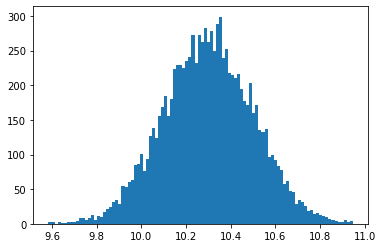

In [ ]:
TabX = [np.random.normal(x, Dx) for i in range(N)]

plt.hist(TabX, bins=100)
plt.show()

Et si la distribution est uniforme, on utilise cette fois **np.random.uniform(b, h)** où $b$ est la valeur basse de la distribution et $h$ sa valeur haute.



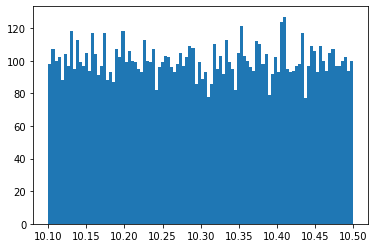

In [ ]:
TabX = [np.random.uniform(x-Dx, x+Dx) for i in range(N)]

plt.hist(TabX, bins=100)
plt.show()

Et si on veut obtenir des valeurs de $z$ à partir de cette distribution uniforme, on écrit :

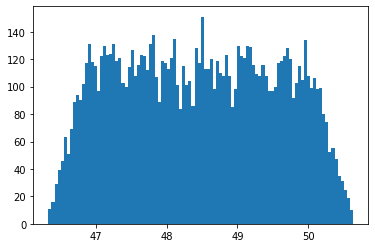

In [ ]:
TabZ = [ z(np.random.uniform(x-Dx, x+Dx), np.random.uniform(y-Dy, y+Dy)) for i in range(N)]

plt.hist(TabZ, bins=100)
plt.show()

Cette répartition conduit à la moyenne et à l'écart-type suivant :

In [ ]:
moy = np.mean(TabZ)
incert = np.std(TabZ)

print('z = ' + str(round(moy,2)) + " +/- " + str(round(incert,2)) )

z = 48.45 +/- 1.1
